# Gausian Mixture Model for Bird Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm


In [3]:
# data = pd.read_csv('ebd_US-CO_202001_202312_smp_relMar-2024/ebd_US-CO_202001_202312_smp_relMar-2024.txt', sep = '\t')
# data = data[['COMMON NAME', 'COUNTY', 'COUNTY CODE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE', 'NUMBER OBSERVERS']]
# data.to_csv('bird_data.csv')

data = pd.read_csv('bird_data.csv')

print("DataFrame:")
print(data.head(5))

# select only necessary columns
df = data[['COMMON NAME', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE']]


DataFrame:
   Unnamed: 0    COMMON NAME COUNTY COUNTY CODE   LATITUDE   LONGITUDE  \
0           0  Accipiter sp.  Adams   US-CO-001  39.947339 -104.747209   
1           1  American Crow  Adams   US-CO-001  39.797274 -104.931060   
2           2  American Crow  Adams   US-CO-001  39.789034 -104.905840   
3           3  American Crow  Adams   US-CO-001  39.830492 -104.948991   
4           4  American Crow  Adams   US-CO-001  39.830492 -104.948991   

  OBSERVATION DATE  NUMBER OBSERVERS  
0       2020-01-10               1.0  
1       2020-01-01               5.0  
2       2020-01-02               1.0  
3       2020-01-01              10.0  
4       2020-01-01              10.0  


In [ ]:
# convert observation date column to datetime
df['OBSERVATION DATE'] = pd.to_datetime(df['OBSERVATION DATE'])

# define functions to filter data for each season
def filter_winter(date): # december to february
    return (date.month == 12) or (date.month == 1) or (date.month == 2)

def filter_spring(date): # march to may
    return (date.month == 3) or (date.month == 4) or (date.month == 5)

def filter_summer(date): # june to august
    return (date.month == 6) or (date.month == 7) or (date.month == 8)

def filter_fall(date): # september to november
    return (date.month == 9) or (date.month == 10) or (date.month == 11)

# Apply filters to create new dataframes for each season
winter_df = df[df['OBSERVATION DATE'].apply(filter_winter)]
spring_df = df[df['OBSERVATION DATE'].apply(filter_spring)]
summer_df = df[df['OBSERVATION DATE'].apply(filter_summer)]
fall_df = df[df['OBSERVATION DATE'].apply(filter_fall)]

# Print the dataframes for each season
print("Winter DataFrame:")
print(winter_df.head(5))
print("\nSpring DataFrame:")
print(spring_df.head(5))
print("\nSummer DataFrame:")
print(summer_df.head(5))
print("\nFall DataFrame:")
print(fall_df.head(5))

C:\Users\emman\AppData\Local\Temp\ipykernel_16752\1081356154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBSERVATION DATE'] = pd.to_datetime(df['OBSERVATION DATE'])


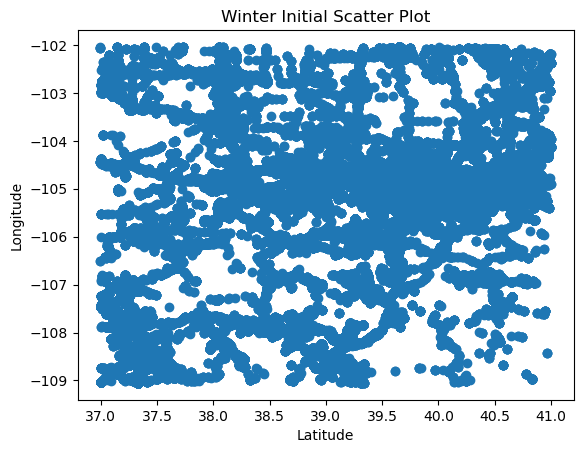

In [13]:
plt.scatter(winter_df['LATITUDE'], winter_df['LONGITUDE'])
plt.title('Winter Initial Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
plt.scatter(spring_df['LATITUDE'], spring_df['LONGITUDE'])
plt.title('Spring Initial Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
plt.scatter(summer_df['LATITUDE'], summer_df['LONGITUDE'])
plt.title('Summer Initial Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
plt.scatter(fall_df['LATITUDE'], fall_df['LONGITUDE'])
plt.title('Fall Initial Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [2]:
# Used the starter code on canvas

def GMM(dat, k):
    ##
    
    # define some variables
    covars = np.zeros((k,2,2)) # covariance matrix
    means = np.zeros((k,2)) # mean values of each component
    p_class = np.zeros(k) # W_m (weights/likelihood of each component)
    p_data_given_class = np.zeros((len(dat),k)) # P(x_i | cluster = m)
    
    # initialize means, covs, p_classes
    init_idx = np.random.choice(range(len(dat)), size=k, replace=False) # initalizations of starting points used to initialize means
    
    # initialize covariance matrix, means, and p_class for each k
    for dim in range(k):
        # set cov matrix of each component to the cov of the entire dataset
        covars[dim,:,:] = np.cov(np.transpose(dat))
        
        # set initial means to the initial chosen data points
        means[dim, :] = dat.iloc[init_idx[dim]]
        
        # give each component equal weighting to start
        p_class[dim] = 1/k
        
    # iterate: for loop alternating between: (1) Expectation Step and (2) Maximization Step
    for _ in range(50):
        
        # Expectation Step
        for i in range(k):
            p_data_given_class[:,i] = stats.multivariate_normal.pdf(dat, mean=means[i], cov=covars[i])
        
        p_class_given_data = p_data_given_class * p_class
        p_class_given_data = p_class_given_data / p_class_given_data.sum(axis=1,keepdims=True)
        
        # Maximization Step
        for i in range(k):
            
            # update weights
            p_class[i] = np.mean(p_class_given_data[:,i])
            
            # update means
            means[i] = np.average(dat, weights=p_class_given_data[:,i],axis=0)
            
            # update covariances
            diff = dat - means[i]
            covars[i] = np.dot(p_class_given_data[:,i]*diff.T,diff) / np.sum(p_class_given_data[:,i])
        
    # compute mean distance
    dat_array = dat.to_numpy()
    mean_dist = np.sum(np.sum(p_class_given_data * np.linalg.norm(dat_array[:, np.newaxis, :] - means, axis=2), axis=1)) / dat_array.shape[0]

    return p_class_given_data, means, covars, p_class, mean_dist

In [ ]:
k_values = [1,2,3,4,5,6,7,8]
distances = []

for k in k_values:
    p_class_given_data, means, covars, p_class, mean_dist = GMM(winter_df,k)
    distances.append(mean_dist)
    
plt.plot(k_values, distances, marker = 'o')
plt.title('Winter Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Weighted-Mean-Distance to Component')
plt.show()

In [ ]:
k_values = [1,2,3,4,5,6,7,8]
distances = []

for k in k_values:
    p_class_given_data, means, covars, p_class, mean_dist = GMM(spring_df,k)
    distances.append(mean_dist)
    
plt.plot(k_values, distances, marker = 'o')
plt.title('Spring Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Weighted-Mean-Distance to Component')
plt.show()

In [ ]:
k_values = [1,2,3,4,5,6,7,8]
distances = []

for k in k_values:
    p_class_given_data, means, covars, p_class, mean_dist = GMM(summer_df,k)
    distances.append(mean_dist)
    
plt.plot(k_values, distances, marker = 'o')
plt.title('Summer Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Weighted-Mean-Distance to Component')
plt.show()

In [ ]:
k_values = [1,2,3,4,5,6,7,8]
distances = []

for k in k_values:
    p_class_given_data, means, covars, p_class, mean_dist = GMM(fall_df,k)
    distances.append(mean_dist)
    
plt.plot(k_values, distances, marker = 'o')
plt.title('Fall Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Weighted-Mean-Distance to Component')
plt.show()

In [ ]:
# perform GMM for k=3
p_class_given_data, means, covars, p_class, mean_dist = GMM(winter_df, 3)

# determine the cluster assignment for each data point
cluster_assignment = np.argmax(p_class_given_data, axis=1)

# plot data points with color according to the cluster assignment
plt.scatter(winter_df['LATITUDE'], winter_df['LONGITUDE'], c=cluster_assignment, cmap='viridis', s=10)
plt.title('k=3')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()
